## G&F (2014) Redo
#### Basic regressions on old source data for Cl/OH partitioning in amphibole

This notebook replicates and potentially extends and improves upon the analysis on chlorine partitioning in igneous amphiboles from Giesting & Filiberto (2014) in American Mineralogist. That work was done with Excel and one of the main reasons I took a data science bootcamp was to learn how to do this sort of thing with better tools. So let me get back into it by doing the *identical* thing with better tools.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
np.set_printoptions(precision=2,suppress=True)

The data in this file is the collection of features prepared from the amphibole compositions. The target ln K(Cl) was calculated using the Lesne et al. (2011) model for water speciation in melt (this is needed to determine how much OH- was in the melt competing for spots in the amphibole with Cl-). The alternative was the Dixon et al. (1995) model. The other models in the toolchain to calculate the various features were constant from scenario to scenario.

In [32]:
filename = "./AmphiboleProcessedRegressionData.csv"
amph_chem = pd.read_csv(filename)
amph_chem.columns

Index(['Mg', 'FeM', 'K/Vac+Na', 'Di/Hi M', 'Fe2+', 'Fe3+', 'Mg# F'ous',
       'ln(fH2O)', 'Si', 'Ti', 'AlM', 'Mn', 'Ca', 'Na', 'Avac', 'K', 'T',
       'lnP', 'AlT/Si', 'Mg#M', 'Mg#', 'Ca/FeB', 'K+Vac/Na', 'ln K(Cl)'],
      dtype='object')

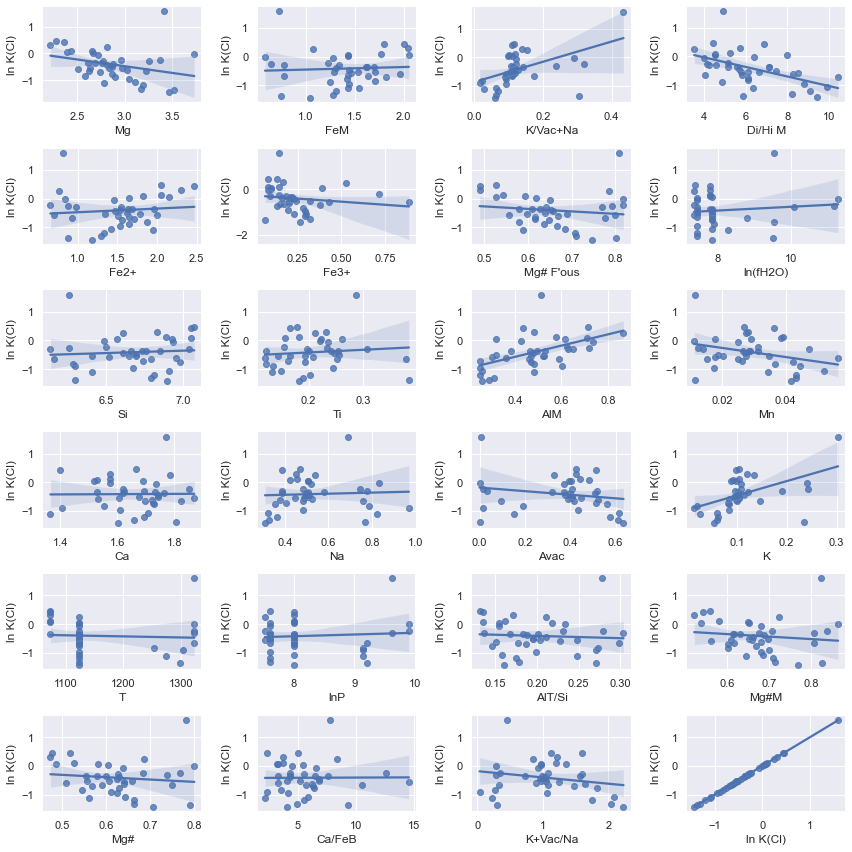

In [20]:
f,axes = plt.subplots(6, 4, figsize=(12,12))
sns.despine(left=True)
for i, col in enumerate(amph_chem.columns):
    sns.regplot(x=amph_chem[col],y=amph_chem['ln K(Cl)'],ax=axes[i//4,i%4])
plt.tight_layout()

In [15]:
XLesne3 = amph_chem[['K/Vac+Na','Mg','FeM']]
XLesne3.head()

,K/Vac+Na,Mg,FeM
0,0.434545,3.421042,0.733372
1,0.305333,3.526782,0.747619
2,0.289957,3.737951,0.586423
3,0.318876,3.379470,0.648122
4,0.236740,3.260124,0.781527


In [16]:
y = amph_chem['ln K(Cl)']
type(y)

pandas.core.series.Series

In [17]:
X1 = sm.add_constant(XLesne3)
Lesne3_model = sm.OLS(y,X1)
Lesne3_results = Lesne3_model.fit()

In [18]:
Lesne3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln K(Cl)   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     27.41
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           2.65e-09
Time:                        19:43:50   Log-Likelihood:                -10.638
No. Observations:                  39   AIC:                             29.28
Df Residuals:                      35   BIC:                             35.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6625      1.507      3.094      0.004       1.604       7.721
K/Vac+Na       5.6946      0.855      6.661      0.000       3.959       7.430
Mg            -1.7452      0.354     -4.935      0.000      -2.463      -1.027
FeM           -0.5681      0.359     -1.581      0.123      -1.298       0.161
==============================================================================
Omnibus:                       15.172   Durbin-Watson:                   2.535
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.936
Skew:                          -0.860   Prob(JB):                     3.16e-07
Kurtosis:                       6.933   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
Lesne3_model_noc = sm.OLS(y,XLesne3)
Lesne3_results_noc = Lesne3_model_noc.fit()
Lesne3_results_noc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ln K(Cl)   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.725
Method:                 Least Squares   F-statistic:                              35.31
Date:                Tue, 05 Apr 2022   Prob (F-statistic):                    8.04e-11
Time:                        19:43:50   Log-Likelihood:                         -15.354
No. Observations:                  39   AIC:                                      36.71
Df Residuals:                      36   BIC:                                      41.70
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
K/Vac+Na       6.5881      0.895      7.358      0.000       4.772       8.404
Mg            -0.6788      0.088     -7.674      0.000      -0.858      -0.499
FeM            0.4874      0.126      3.876      0.000       0.232       0.742
==============================================================================
Omnibus:                       15.461   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.711
Skew:                          -1.014   Prob(JB):                     4.31e-06
Kurtosis:                       6.330   Cond. No.                         48.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model has identical parameters to the model in the abstract of Giesting & Filiberto (2014). Thank God, that was easy.

Next step: Use automated feature selection to revisit this first regression. Let's try Lasso since it will actually kill features.

In [33]:
X = amph_chem.drop('ln K(Cl)',axis=1,inplace=False)
X.columns

Index(['Mg', 'FeM', 'K/Vac+Na', 'Di/Hi M', 'Fe2+', 'Fe3+', 'Mg# F'ous',
       'ln(fH2O)', 'Si', 'Ti', 'AlM', 'Mn', 'Ca', 'Na', 'Avac', 'K', 'T',
       'lnP', 'AlT/Si', 'Mg#M', 'Mg#', 'Ca/FeB', 'K+Vac/Na'],
      dtype='object')

In [52]:
lasso_model = Lasso(alpha = 0.007) # 1.0 is scikit-learn default
lasso_model.fit(X,y)

Lasso(alpha=0.007)

In [56]:
lasso_model.score(X,y)

0.6788836350143835

In [59]:
lasso_model.coef_

array([-0.51,  0.  ,  3.65, -0.12, -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
       -0.  ,  0.  , -0.  , -0.  , -0.  , -0.  ,  0.  , -0.  ,  0.21,
       -0.  , -0.  , -0.  , -0.02, -0.  ])

In [61]:
lasso_noc = Lasso(alpha = 0.007,fit_intercept=False)
lasso_noc.fit(X,y)
print(lasso_noc.score(X,y))
lasso_noc.coef_

0.6883144754267808


/home/paulus/miniconda3/envs/amphibole/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.385e+00, tolerance: 1.978e-03
  model = cd_fast.enet_coordinate_descent(


array([-0.12,  0.47,  3.84, -0.13,  0.  ,  0.  ,  0.  ,  0.  ,  0.12,
       -0.  ,  0.31, -0.  , -0.  , -0.  , -0.  ,  0.  , -0.  ,  0.1 ,
       -0.  , -0.  , -0.  , -0.02,  0.  ])

Actually, Lasso is doing a terrible job of trying to get to the result I did using human intuition, including crystal chemistry. I suppose I can be happy about that in a sense.

In [65]:
lasso_pag = Lasso(alpha = 0.0,fit_intercept=False)
lasso_pag.fit(XLesne3,y)
print(r2_score(lasso_pag.predict(XLesne3),y))
lasso_pag.coef_

0.37180091580463004


/tmp/ipykernel_12466/4215977416.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_pag.fit(XLesne3,y)
/home/paulus/miniconda3/envs/amphibole/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/paulus/miniconda3/envs/amphibole/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.509e+00, tolerance: 1.978e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

array([ 6.59, -0.68,  0.49])

There seems to be no agreement on the score between Excel, statsmodels, the native "score" function of the Lasso regressor, and the r2_score in scikit-learn. This is seriously annoying.

The Lasso routine also hacks the score severely if I set alpha to a finite value.

However, it is most important that the Lasso regressor replicates the feature coefficients that statsmodels and Excel produce, and they do all agree.